# Project Title

## Abstract


## Motivation

I am interested to see if it makes sense to invest in movies, whether there is any correlation between the budget and the gross of films, as well as a correlation between these two and the IMDB score given by users.

## Datasets
#### I was using the IMDB dataset from kaggle.com https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

## Research Question

## Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle, islice
from pandas.tools.plotting import parallel_coordinates

In [2]:
data = pd.read_csv('./movie_metadata.csv')

In [3]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.shape

(5043, 28)

In [5]:
list(data.columns.values)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [6]:
data.drop(['color','duration','genres','facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'content_rating','title_year','aspect_ratio'],axis=1,inplace=True)

In [7]:
data.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,245000000.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,23000.0,8.5,164000
4,Doug Walker,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [8]:
data.shape

(5043, 19)

In [9]:
list(data.columns.values)

['director_name',
 'num_critic_for_reviews',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'num_user_for_reviews',
 'language',
 'country',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes']

In [10]:
languages = data['language'].unique()
languages

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'], dtype=object)

In [11]:
len(languages)

48

In [12]:
countries = data['country'].unique()
countries

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [13]:
len(countries)

66

In [14]:
movie_titles = data['movie_title'].unique().tolist()
len (movie_titles)

4917

In [15]:
data = data.dropna()
movie_titles = data['movie_title'].unique().tolist()
len (movie_titles)

3775

In [16]:
data.head (5)

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,245000000.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,263700000.0,632.0,6.6,24000


In [17]:
data.shape

(3877, 19)

In [18]:
data = data.drop_duplicates(subset=['movie_title'])

In [19]:
data.shape

(3775, 19)

In [20]:
country_filter = data['country'].str.contains("USA")

In [21]:
data = data[country_filter]

In [22]:
data.head ()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,263700000.0,632.0,6.6,24000
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,1902.0,English,USA,258000000.0,11000.0,6.2,0


In [23]:
data.shape

(2984, 19)

# Exploration


### Description

In [24]:
data['budget'].describe()

count    2.984000e+03
mean     3.957205e+07
std      4.316954e+07
min      2.180000e+02
25%      1.000000e+07
50%      2.500000e+07
75%      5.300000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [25]:
data['gross'].describe()

count    2.984000e+03
mean     5.676629e+07
std      7.200376e+07
min      7.030000e+02
25%      1.098863e+07
50%      3.354163e+07
75%      7.418699e+07
max      7.605058e+08
Name: gross, dtype: float64

In [26]:
data['imdb_score'].describe ()

count    2984.000000
mean        6.386294
std         1.054704
min         1.600000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: imdb_score, dtype: float64

In [27]:
plot_1 = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.title('IMDB Scores')
plt.hist(data.imdb_score, 20)
plt.xlabel('Score')

plt.subplot(1,3,2)
plt.title('Budget')
plt.hist(data.budget, 10)
plt.xlabel('Budget')

plt.subplot(1,3,3)
plt.title('Gross')
plt.hist(data.gross, 10)
plt.xlabel('Gross')

plot_1.savefig('plot_1.png')

### The films with top IMDB scores

In [28]:
data_imdb=data.sort_values(by='imdb_score',ascending=False)
data_imdb.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1937,Frank Darabont,199.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,4144.0,English,USA,25000000.0,745.0,9.3,108000
3466,Francis Ford Coppola,208.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Al Pacino,The Godfather,1155770,28122,Robert Duvall,2238.0,English,USA,6000000.0,10000.0,9.2,43000
2837,Francis Ford Coppola,149.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,650.0,English,USA,13000000.0,14000.0,9.0,14000
66,Christopher Nolan,645.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,4667.0,English,USA,185000000.0,13000.0,9.0,37000
339,Peter Jackson,328.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,3189.0,English,USA,94000000.0,857.0,8.9,16000


### The films with the highest budgets

In [29]:
data_budget=data.sort_values(by='budget',ascending=False)
data_budget.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,263700000.0,632.0,6.6,24000
7,Nathan Greno,324.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,387.0,English,USA,260000000.0,553.0,7.8,29000
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,1902.0,English,USA,258000000.0,11000.0,6.2,0
18,Rob Marshall,448.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Johnny Depp,Pirates of the Caribbean: On Stranger Tides,370704,54083,Stephen Graham,484.0,English,USA,250000000.0,11000.0,6.7,58000


### The films with the highest gross

In [30]:
data_gross=data.sort_values(by='gross',ascending=False)
data_gross.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000
26,James Cameron,315.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,2528.0,English,USA,200000000.0,14000.0,7.7,26000
29,Colin Trevorrow,644.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,1290.0,English,USA,150000000.0,2000.0,7.0,150000
17,Joss Whedon,703.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,1722.0,English,USA,220000000.0,21000.0,8.1,123000
66,Christopher Nolan,645.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,4667.0,English,USA,185000000.0,13000.0,9.0,37000


# Checking for correlation between the features

In [31]:
corr = data.corr()


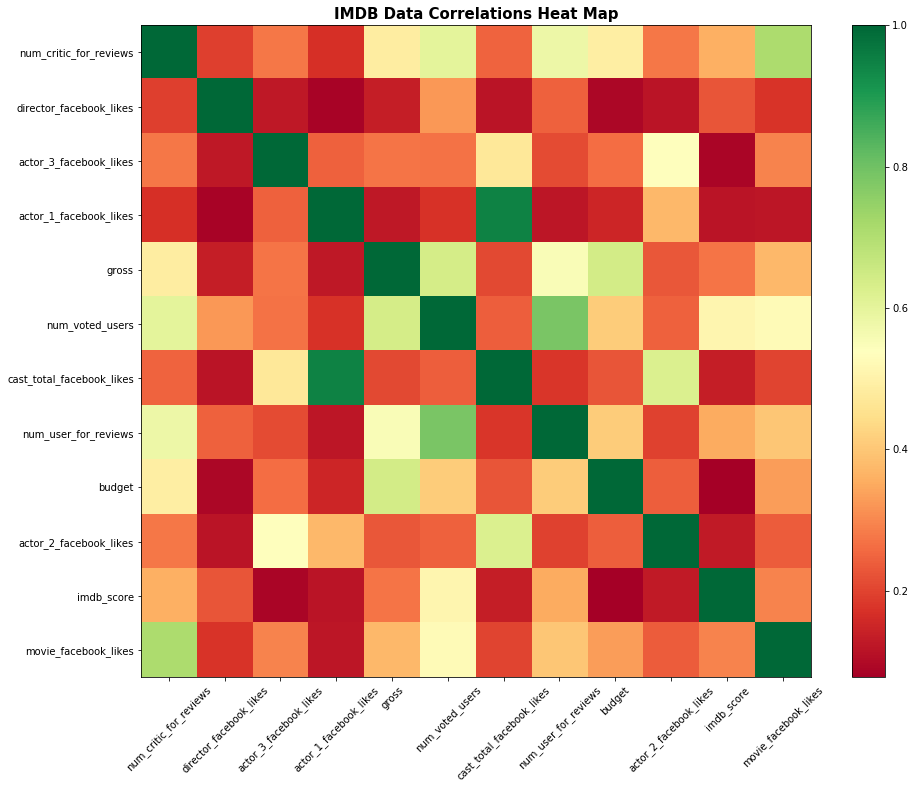

In [32]:
%matplotlib inline
plot_2 = plt.figure(figsize=(15, 12))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns);
plt.title('IMDB Data Correlations Heat Map', fontsize=15, fontweight='bold')
plot_2.savefig('plot_2.png')
plt.show()

#### There is some correlation between budget and gross, let's see how much it is

In [33]:
np.corrcoef(data['budget'],data['gross'])

array([[ 1.        ,  0.64311013],
       [ 0.64311013,  1.        ]])

#### There is approximately a 64% correlation between the budget for a film and the gross it makes. 


# Plots

## Scores vs. budget and gross

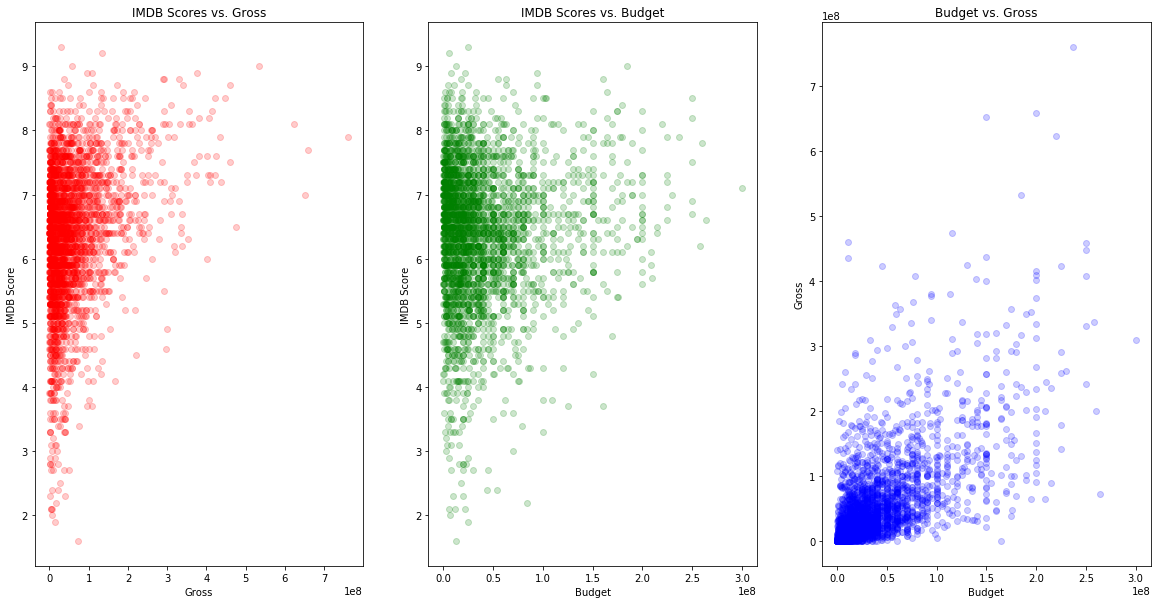

In [94]:
plot_3 = plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.title('IMDB Scores vs. Gross')
plt.plot(data.gross, data.imdb_score, 'ro',alpha = 0.2)
plt.xlabel('Gross')
plt.ylabel('IMDB Score')

plt.subplot(1,3,2)
plt.title('IMDB Scores vs. Budget')
plt.plot(data.budget, data.imdb_score, 'go',alpha = 0.2,)
plt.xlabel('Budget')
plt.ylabel('IMDB Score')

plt.subplot(1,3,3)
plt.title('Budget vs. Gross')
plt.plot(data.budget, data.gross, 'bo',alpha = 0.2)
plt.xlabel('Budget')
plt.ylabel('Gross')

plot_3.savefig('plot_3.png') 

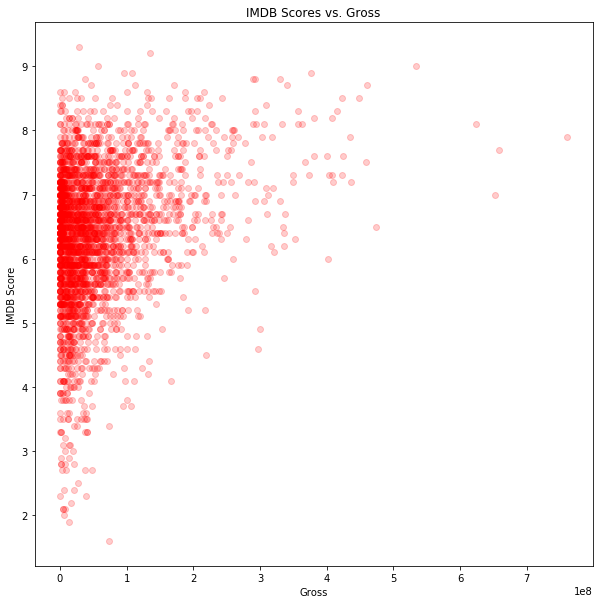

In [92]:
plot_4 = plt.figure(figsize = (10,10))
plt.title('IMDB Scores vs. Gross')
plt.plot(data.gross, data.imdb_score, 'ro',alpha = 0.2)
plt.xlabel('Gross')
plt.ylabel('IMDB Score')
plot_4.savefig('plot_4.png')

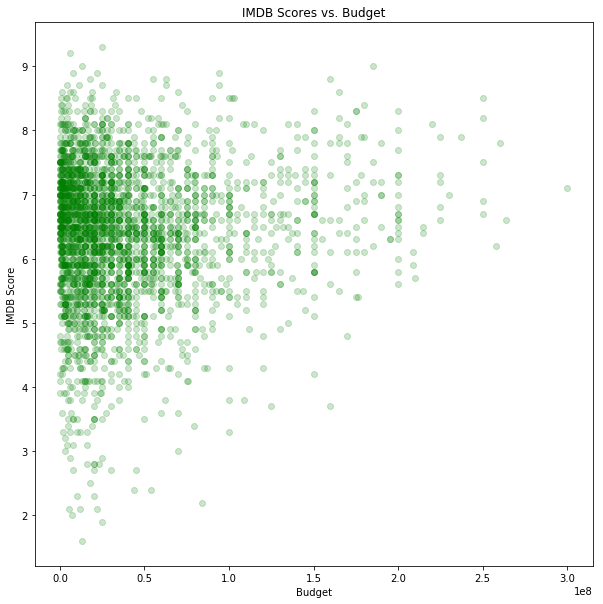

In [91]:
plot_5 = plt.figure(figsize = (10,10))
plt.title('IMDB Scores vs. Budget')
plt.plot(data.budget, data.imdb_score, 'go',alpha = 0.2,)
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plot_5.savefig('plot_5.png')

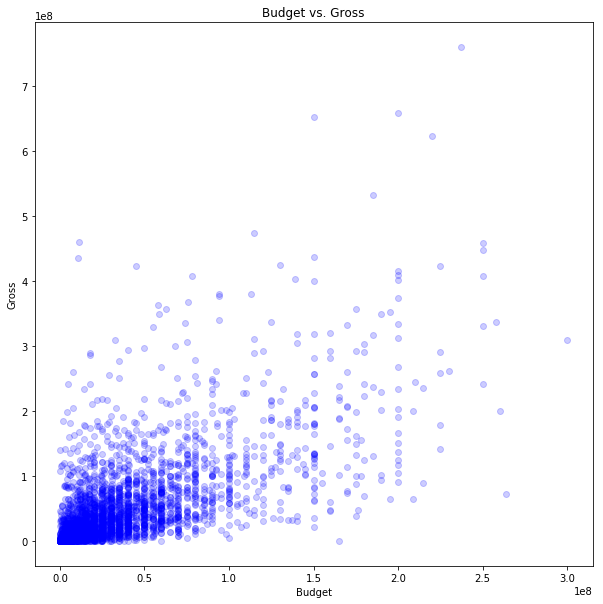

In [37]:
plot_6 = plt.figure(figsize = (10,10))
plt.title('Budget vs. Gross')
plt.plot(data.budget, data.gross, 'bo',alpha = 0.2)
plt.xlabel('Budget')
plt.ylabel('Gross')
plot_6.savefig('plot_6.png')

# Kmeans Start


In [38]:
stage_3=data.select_dtypes([np.number])

In [39]:
len(stage_3)

2984

In [40]:
X = StandardScaler().fit_transform(stage_3)
X

array([[  4.51162349,  -0.27270187,   0.02271135, ...,  -0.25052601,
          1.43543634,   1.09609994],
       [  1.13016554,  -0.10443582,   0.09747584, ...,   0.60262816,
          0.6768024 ,  -0.42076007],
       [  5.23450049,   6.30252558,  11.44105438, ...,   4.38136219,
          2.00441179,   7.11757456],
       ..., 
       [ -0.84569826,  -0.27270187,  -0.41504766, ...,  -0.44282159,
          0.48714392,  -0.42076007],
       [ -1.18304086,  -0.27270187,  -0.34956427, ...,  -0.4039846 ,
          0.01299771,  -0.40177634],
       [ -0.95011382,  -0.26791989,  -0.40989149, ...,  -0.4421918 ,
          0.20265619,  -0.39979983]])

In [41]:
features = ['budget', 'gross', 'imdb_score']

In [42]:
stage_3[features]

,budget,gross,imdb_score
0,237000000.0,760505847.0,7.9
1,300000000.0,309404152.0,7.1
3,250000000.0,448130642.0,8.5
5,263700000.0,73058679.0,6.6
6,258000000.0,336530303.0,6.2
7,260000000.0,200807262.0,7.8
8,250000000.0,458991599.0,7.5
10,250000000.0,330249062.0,6.9
11,209000000.0,200069408.0,6.1
13,225000000.0,423032628.0,7.3


In [43]:
from sklearn.cluster import KMeans
kmeans_df =  stage_3[features]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
print(kmeans.cluster_centers_)

[[  2.24460889e+07   2.47219860e+07   6.25581181e+00]
 [  7.47148324e+07   1.11865125e+08   6.62605531e+00]
 [  1.40238760e+08   3.01875990e+08   7.30232558e+00]]


In [44]:
print(kmeans.labels_)

[2 2 2 ..., 0 0 0]


In [45]:
kmeans_df.head()

,budget,gross,imdb_score
0,237000000.0,760505847.0,7.9
1,300000000.0,309404152.0,7.1
3,250000000.0,448130642.0,8.5
5,263700000.0,73058679.0,6.6
6,258000000.0,336530303.0,6.2


In [46]:
labels = kmeans.predict(kmeans_df)

In [47]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [48]:
#kmeans_df = pd.concat([kmeans_df,labels],axis=1)

In [49]:
kmeans_df['label']= kmeans.labels_

C:\Users\gabor.forgacs\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
kmeans_df.head()

,budget,gross,imdb_score,label
0,237000000.0,760505847.0,7.9,2
1,300000000.0,309404152.0,7.1,2
3,250000000.0,448130642.0,8.5,2
5,263700000.0,73058679.0,6.6,1
6,258000000.0,336530303.0,6.2,2


In [51]:
filter_0 = kmeans_df['label'] == 0
filter_1 = kmeans_df['label'] == 1
filter_2 = kmeans_df['label'] == 2

In [52]:
label_0 = kmeans_df[filter_0]
label_1 = kmeans_df[filter_1]
label_2 = kmeans_df[filter_2]

In [53]:
label_0.head()

,budget,gross,imdb_score,label
215,85000000.0,32694788.0,6.6,0
271,110000000.0,24004159.0,5.8,0
317,90000000.0,39292022.0,6.1,0
318,105000000.0,28772222.0,5.3,0
319,84000000.0,17010646.0,2.2,0


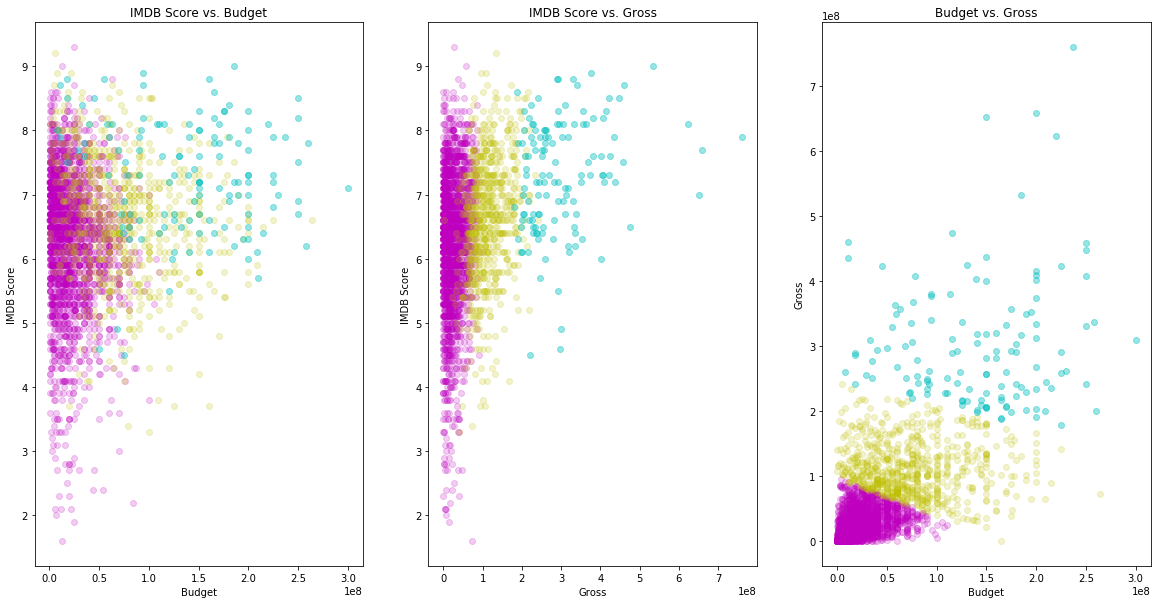

In [81]:
plot_7 = plt.figure(figsize = (20,10))

#subplot 1 
plt.subplot(1,3,1)
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs. Budget')
plt.plot(label_0.budget,label_0.imdb_score,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.budget,label_1.imdb_score,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.budget,label_2.imdb_score,'o', color = 'c', alpha = 0.4)

#subplot 2
plt.subplot(1,3,2)
plt.xlabel('Gross')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs. Gross')
plt.plot(label_0.gross,label_0.imdb_score,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.gross,label_1.imdb_score,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.gross,label_2.imdb_score,'o', color = 'c', alpha = 0.4)


#subplot 3 
plt.subplot(1,3,3)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs. Gross')
plt.plot(label_0.budget,label_0.gross,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.budget,label_1.gross,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.budget,label_2.gross,'o', color = 'c', alpha = 0.4)


plot_7.savefig('plot_7.png')

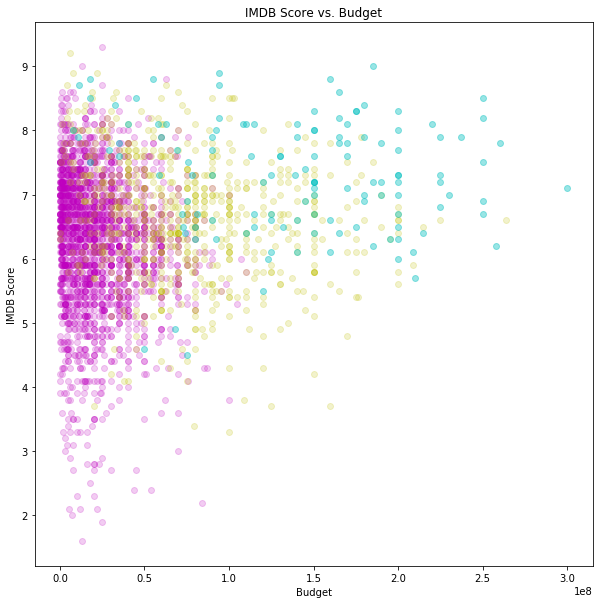

In [86]:
plot_8 = plt.figure(figsize=(10,10))
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs. Budget')
plt.plot(label_0.budget,label_0.imdb_score,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.budget,label_1.imdb_score,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.budget,label_2.imdb_score,'o', color = 'c', alpha = 0.4)

plot_8.savefig ('plot_8.png')

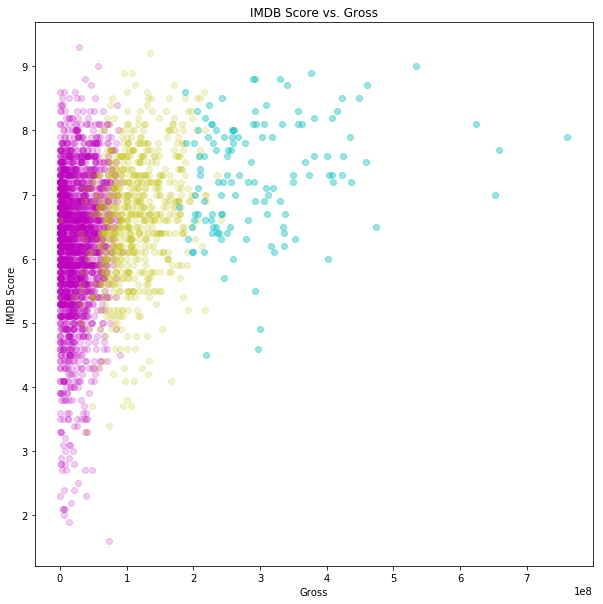

In [90]:
plot_9 = plt.figure(figsize=(10,10))
plt.xlabel('Gross')
plt.ylabel('IMDB Score')
plt.title('IMDB Score vs. Gross')
plt.plot(label_0.gross,label_0.imdb_score,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.gross,label_1.imdb_score,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.gross,label_2.imdb_score,'o', color = 'c', alpha = 0.4)

plot_9.savefig ('plot_9.png')

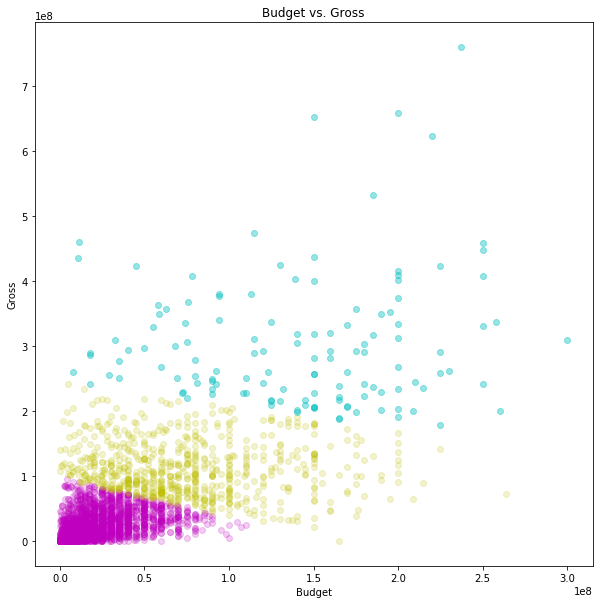

In [89]:
plot_10 = plt.figure(figsize=(10,10))
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs. Gross')
plt.plot(label_0.budget,label_0.gross,'o', color = 'm', alpha = 0.2)
plt.plot(label_1.budget,label_1.gross,'o', color = 'y', alpha = 0.2)
plt.plot(label_2.budget,label_2.gross,'o', color = 'c', alpha = 0.4)

plot_10.savefig('plot_10.png')

# Profitability

In [58]:
data['profit'] = data.gross-data.budget

In [59]:
data['profitability'] = (data['profit'] > 0)*1
data['profitability'].head(15)

0     1
1     1
3     1
5     0
6     1
7     0
8     1
10    1
11    0
13    1
14    0
15    1
16    0
17    1
18    0
Name: profitability, dtype: int32

In [60]:
data.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profitability
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000,523505847.0,1
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0,9404152.0,1
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,23000.0,8.5,164000,198130642.0,1
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,...,Polly Walker,738.0,English,USA,263700000.0,632.0,6.6,24000,-190641321.0,0
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,...,Kirsten Dunst,1902.0,English,USA,258000000.0,11000.0,6.2,0,78530303.0,1


In [61]:
len(data['imdb_score'])

2984

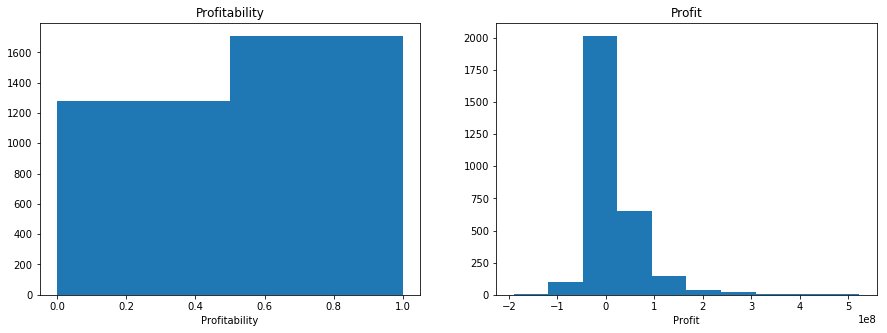

In [62]:
plot_11 = plt.figure(figsize = (15,5))
plt.subplot (1,2,1)
plt.title('Profitability')
plt.hist(data.profitability, 2)
plt.xlabel('Profitability')

plt.subplot (1,2,2)
plt.title('Profit')
plt.hist(data.profit, 10)
plt.xlabel('Profit')
plot_11.savefig('plot_11.png')

## Decision trees for profitability

In [63]:
data.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,actor_3_name,num_user_for_reviews,language,country,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profitability
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,Wes Studi,3054.0,English,USA,237000000.0,936.0,7.9,33000,523505847.0,1
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,Jack Davenport,1238.0,English,USA,300000000.0,5000.0,7.1,0,9404152.0,1
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,Joseph Gordon-Levitt,2701.0,English,USA,250000000.0,23000.0,8.5,164000,198130642.0,1
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,...,Polly Walker,738.0,English,USA,263700000.0,632.0,6.6,24000,-190641321.0,0
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,...,Kirsten Dunst,1902.0,English,USA,258000000.0,11000.0,6.2,0,78530303.0,1


In [64]:
features_3= ['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users','cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes','profit','profitability']

In [65]:
tree_data = data[features_3]

In [66]:
tree_data.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,profitability
0,723.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,523505847.0,1
1,302.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,9404152.0,1
3,813.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,198130642.0,1
5,462.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,-190641321.0,0
6,392.0,0.0,4000.0,24000.0,336530303.0,383056,46055,1902.0,258000000.0,11000.0,6.2,0,78530303.0,1


In [67]:
y=tree_data[['profitability']].copy()

In [68]:
#features_4 = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users','cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes','profit']

features_4 = ['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users','cast_total_facebook_likes', 'num_user_for_reviews', 'actor_2_facebook_likes', 'imdb_score','movie_facebook_likes']

In [69]:
z = tree_data[features_4].copy()

In [70]:
y.head ()

,profitability
0,1
1,1
3,1
5,0
6,1


In [71]:
z.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,886204,4834,3054.0,936.0,7.9,33000
1,302.0,563.0,1000.0,40000.0,471220,48350,1238.0,5000.0,7.1,0
3,813.0,22000.0,23000.0,27000.0,1144337,106759,2701.0,23000.0,8.5,164000
5,462.0,475.0,530.0,640.0,212204,1873,738.0,632.0,6.6,24000
6,392.0,0.0,4000.0,24000.0,383056,46055,1902.0,11000.0,6.2,0


In [72]:
z.columns

Index(['num_critic_for_reviews', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [73]:
y.columns

Index(['profitability'], dtype='object')

In [74]:
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.33, random_state=324)

In [75]:
classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(z_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [76]:
type(classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [77]:
predictions = classifier.predict(z_test)

In [78]:
predictions[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [79]:
y_test['profitability'][:10]

1737    1
289     0
1948    1
1087    1
2054    1
4285    0
1764    1
1100    1
2546    1
3795    0
Name: profitability, dtype: int32

In [80]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.64365482233502536